# Smoothign with Box Filter

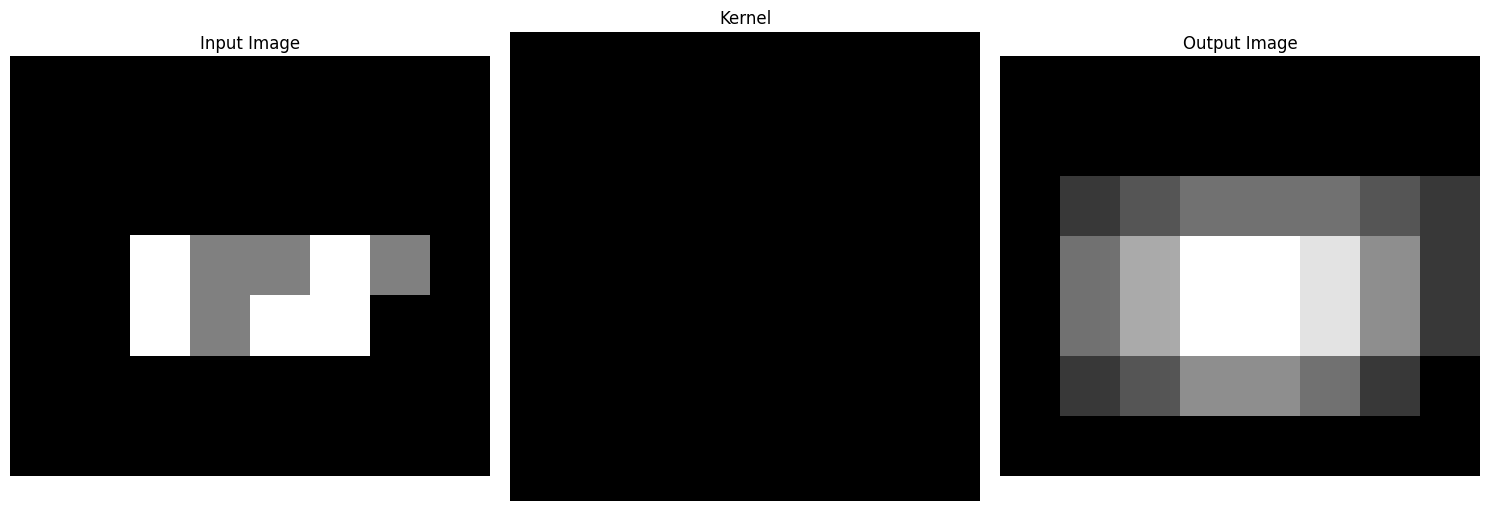

In [4]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Define input image and kernel
f = np.array([[0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 180, 90, 90, 180, 90, 0],
              [0, 0, 180, 90, 180, 180, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0]])

k = 1/9 * np.array([[1, 1, 1],
                    [1, 1, 1],
                    [1, 1, 1]])

# Apply filter
g = cv.filter2D(f.astype(np.float32), -1, k.astype(np.float32))

# Plot input image, kernel, and output image
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot input image
axs[0].imshow(f, cmap='gray')
axs[0].set_title('Input Image')
axs[0].axis('off')
axs[0].grid(True, color='white', linewidth=1.5)

# Plot kernel
axs[1].imshow(k, cmap='gray')
axs[1].set_title('Kernel')
axs[1].axis('off')
axs[1].grid(True, color='white', linewidth=1.5)

# Plot output image
axs[2].imshow(g, cmap='gray')
axs[2].set_title('Output Image')
axs[2].axis('off')
axs[2].grid(True, color='white', linewidth=1.5)

plt.tight_layout()
plt.show()

# Averrage Fitlering Using Loops
Do not use this as this is inefficient and does not work for any kernel in gerneral due not doing a propper convertion to uint8.

True

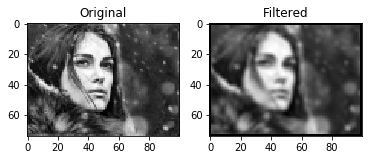

In [ ]:
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import math

def filter(image, kernel):
    assert kernel.shape[0]%2 == 1 and kernel.shape[1]%2 == 1
    k_hh, k_hw = math.floor(kernel.shape[0]/2), math.floor(kernel.shape[1]/2)
    h, w = image.shape
    image_float = cv.normalize(image.astype('float'), None, 0.0, 1.0, cv.NORM_MINMAX)
    result = np.zeros(image.shape, 'float')

    for m in range(k_hh, h - k_hh):
        for n in range(k_hw, w - k_hw):
            result[m,n] = np.dot(image_float[m-k_hh:m + k_hh + 1, n - k_hw : n + k_hw + 1].flatten(), kernel.flatten())
    return result

img = cv.imread('./images/keira.jpg', cv.IMREAD_REDUCED_GRAYSCALE_8)
f, axarr = plt.subplots(1,2)
axarr[0].imshow(img, cmap="gray")
axarr[0].set_title('Original')
kernel = np.array([(1/9, 1/9, 1/9), (1/9, 1/9, 1/9), (1/9, 1/9, 1/9)], dtype='float')
imgb = filter(img, kernel)
imgb = imgb*255.0
imgb = imgb.astype(np.uint8)

axarr[1].imshow(imgb, cmap="gray")
axarr[1].set_title('Filtered')
cv.imwrite('keira_filtered.png', imgb)

Averaging Using Filt2D

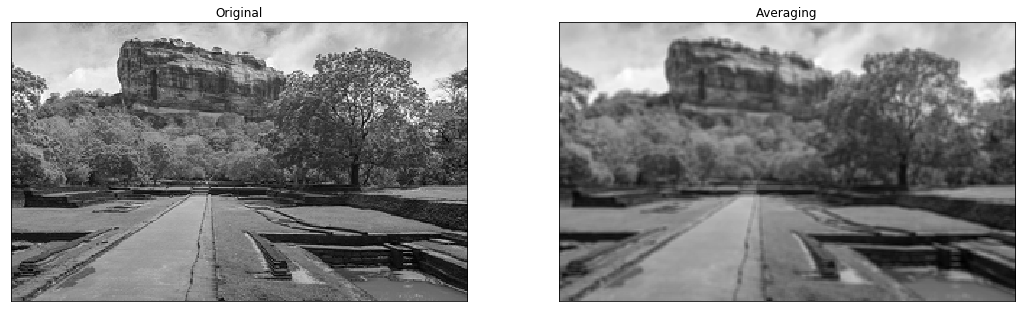

In [ ]:
%matplotlib inline
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('./images/sigiriya.jpg', cv.IMREAD_REDUCED_GRAYSCALE_2)

# Averaging
kernel = np.ones((3,3),np.float32)/9
imgc = cv.filter2D(img,-1,kernel)


fig, axes  = plt.subplots(1,2, sharex='all', sharey='all', figsize=(18,18))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(imgc, cmap='gray')
axes[1].set_title('Averaging')
axes[1].set_xticks([]), axes[1].set_yticks([])
plt.show()

# Averaging Using Filt2D

# Sobel Filtering

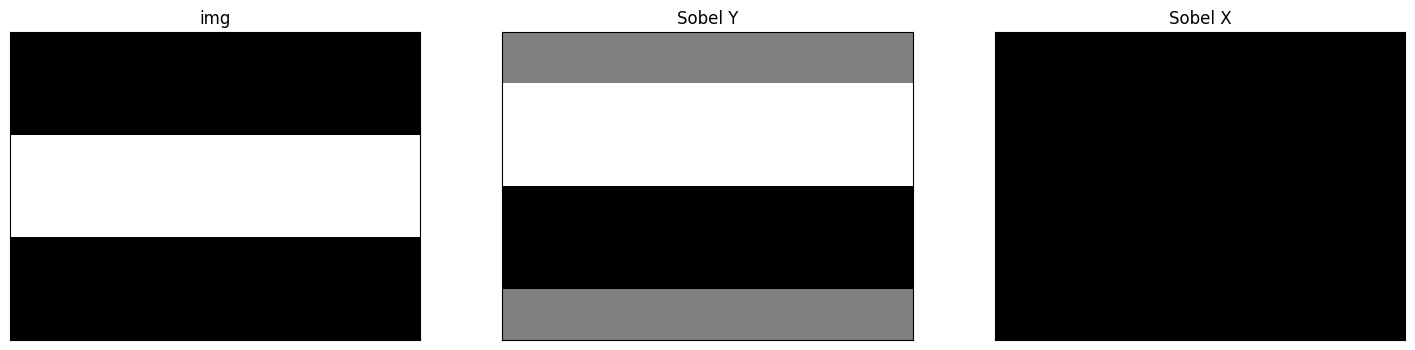

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Creating the img
im = np.zeros((6,8), dtype=np.uint8)
im[2,:] = 255
im[3,:] = 255

# Sobel Filters
sobel_y = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]])
sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]])

im_y = cv.filter2D(im, cv.CV_64F, sobel_y)
im_x = cv.filter2D(im, cv.CV_64F, sobel_x)


fig, ax  = plt.subplots(1,3, sharex='all', sharey='all', figsize=(18,9))

ax[0].imshow(im, cmap='gray')
ax[0].set_title('img')
ax[0].set_xticks([]), ax[0].set_yticks([])

ax[1].imshow(im_y, cmap='gray')
ax[1].set_title('Sobel Y')
ax[1].set_xticks([]), ax[1].set_yticks([])

ax[2].imshow(im_x, cmap='gray')
ax[2].set_title('Sobel X')
ax[2].set_xticks([]), ax[2].set_yticks([])

plt.show()

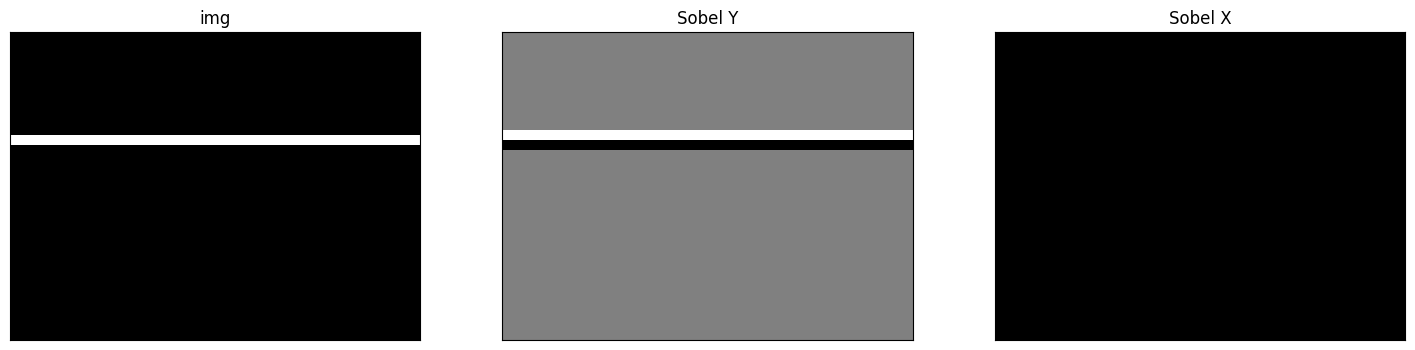

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Creating the img
im = np.zeros((60,80), dtype=np.uint8)
im[20,:] = 255
im[21,:] = 255

# Sobel Filters
sobel_y = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]])
sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]])

im_y = cv.filter2D(im, cv.CV_64F, sobel_y)
im_x = cv.filter2D(im, cv.CV_64F, sobel_x)


fig, ax  = plt.subplots(1,3, sharex='all', sharey='all', figsize=(18,9))

ax[0].imshow(im, cmap='gray')
ax[0].set_title('img')
ax[0].set_xticks([]), ax[0].set_yticks([])

ax[1].imshow(im_y, cmap='gray')
ax[1].set_title('Sobel Y')
ax[1].set_xticks([]), ax[1].set_yticks([])

ax[2].imshow(im_x, cmap='gray')
ax[2].set_title('Sobel X')
ax[2].set_xticks([]), ax[2].set_yticks([])

plt.show()

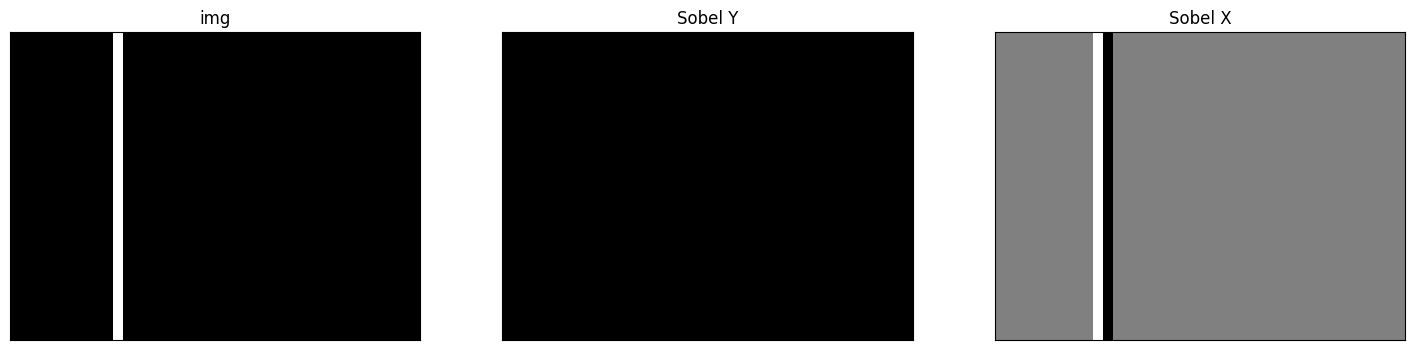

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Creating the img
im = np.zeros((60,80), dtype=np.uint8)
im[:,20] = 255
im[:,21] = 255

# Sobel Filters
sobel_y = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]])
sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]])

im_y = cv.filter2D(im, cv.CV_64F, sobel_y)
im_x = cv.filter2D(im, cv.CV_64F, sobel_x)


fig, ax  = plt.subplots(1,3, sharex='all', sharey='all', figsize=(18,9))

ax[0].imshow(im, cmap='gray')
ax[0].set_title('img')
ax[0].set_xticks([]), ax[0].set_yticks([])

ax[1].imshow(im_y, cmap='gray')
ax[1].set_title('Sobel Y')
ax[1].set_xticks([]), ax[1].set_yticks([])

ax[2].imshow(im_x, cmap='gray')
ax[2].set_title('Sobel X')
ax[2].set_xticks([]), ax[2].set_yticks([])

plt.show()

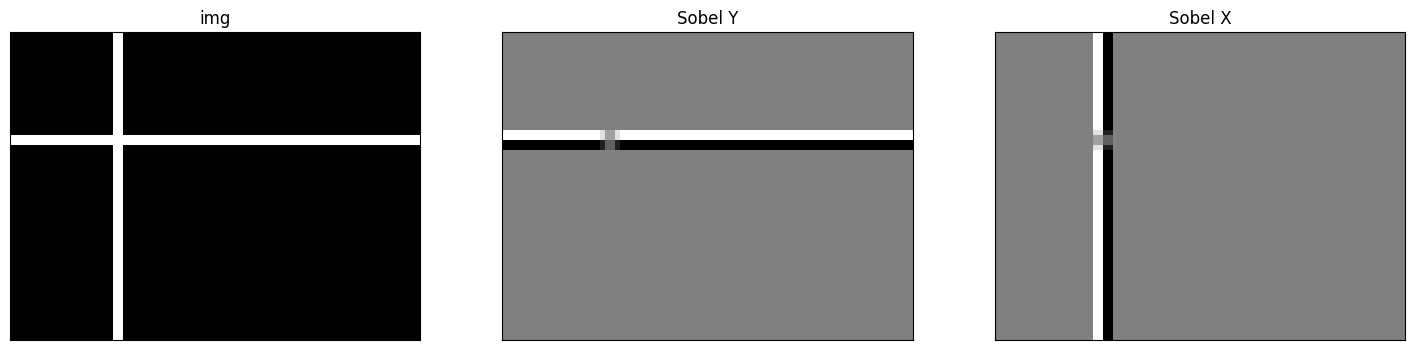

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Creating the img
im = np.zeros((60,80), dtype=np.uint8)
im[20,:] = 255
im[21,:] = 255
im[:,20] = 255
im[:,21] = 255

# Sobel Filters
sobel_y = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]])
sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]])

im_y = cv.filter2D(im, cv.CV_64F, sobel_y)
im_x = cv.filter2D(im, cv.CV_64F, sobel_x)


fig, ax  = plt.subplots(1,3, sharex='all', sharey='all', figsize=(18,9))

ax[0].imshow(im, cmap='gray')
ax[0].set_title('img')
ax[0].set_xticks([]), ax[0].set_yticks([])

ax[1].imshow(im_y, cmap='gray')
ax[1].set_title('Sobel Y')
ax[1].set_xticks([]), ax[1].set_yticks([])

ax[2].imshow(im_x, cmap='gray')
ax[2].set_title('Sobel X')
ax[2].set_xticks([]), ax[2].set_yticks([])

plt.show()

# Border Effect

(113, 113)
(135, 135)
(135, 135)


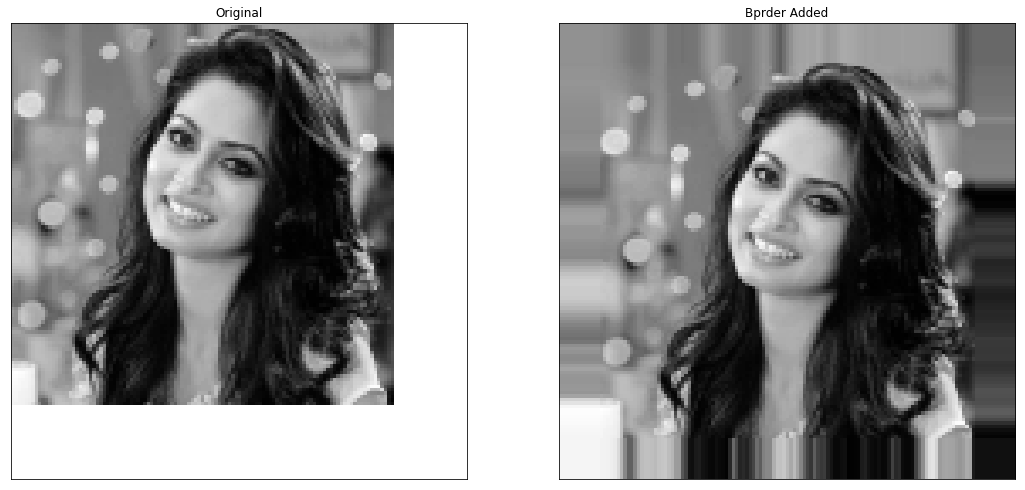

In [ ]:
# Border Effect
import cv2 as cv
import matplotlib.pyplot as plt
img = cv.imread('../images/puja.jpg', cv.IMREAD_REDUCED_GRAYSCALE_8)

sigma = 1
kernel = cv.getGaussianKernel(11, sigma)
b = 11
dst = cv.copyMakeBorder(img, top = b, bottom = b, left = b, right = b, borderType=cv.BORDER_REPLICATE)

result = cv.sepFilter2D(dst, -1, kernel, kernel, anchor=(-1,-1), delta=0, borderType=cv.BORDER_REPLICATE)
print(img.shape)
print(dst.shape)
print(result.shape)

fig, axes  = plt.subplots(1,2, sharex='all', sharey='all', figsize=(18,18))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(dst, cmap='gray')
axes[1].set_title('Bprder Added')
axes[1].set_xticks([]), axes[1].set_yticks([])
plt.show()


# Creatign a Gaussian Kernel

[[2.21033492e-12 3.62605054e-12 5.88934066e-12 ... 5.88934066e-12
  3.62605054e-12 2.21033492e-12]
 [3.62605054e-12 5.94852952e-12 9.66145299e-12 ... 9.66145299e-12
  5.94852952e-12 3.62605054e-12]
 [5.88934066e-12 9.66145299e-12 1.56918905e-11 ... 1.56918905e-11
  9.66145299e-12 5.88934066e-12]
 ...
 [5.88934066e-12 9.66145299e-12 1.56918905e-11 ... 1.56918905e-11
  9.66145299e-12 5.88934066e-12]
 [3.62605054e-12 5.94852952e-12 9.66145299e-12 ... 9.66145299e-12
  5.94852952e-12 3.62605054e-12]
 [2.21033492e-12 3.62605054e-12 5.88934066e-12 ... 5.88934066e-12
  3.62605054e-12 2.21033492e-12]]


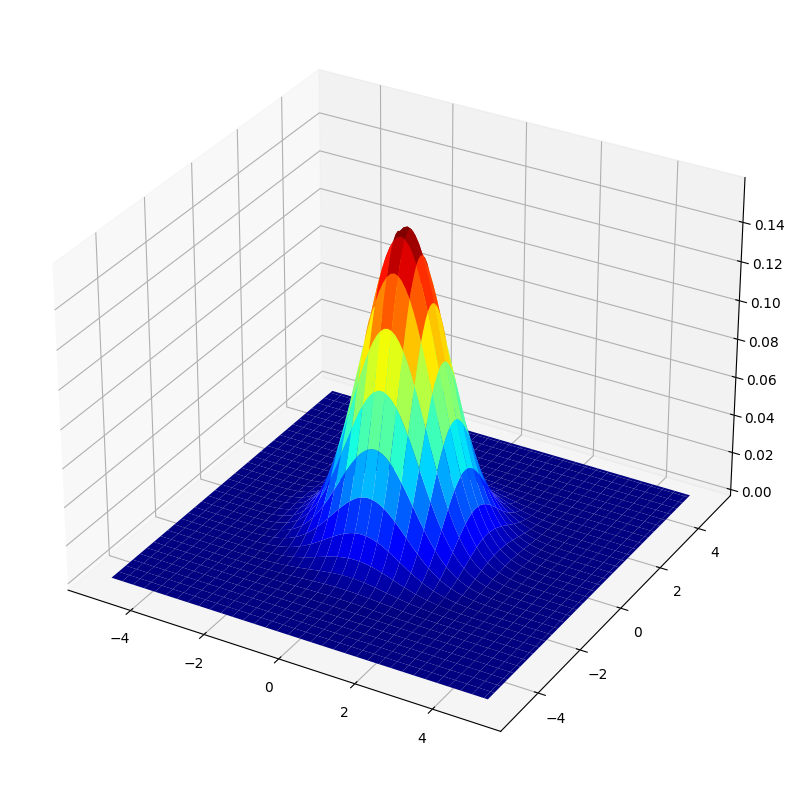

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
import math

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
sigma = 1

X = np.arange(-5, 5.1, 0.1)
Y = np.arange(-5, 5.1, 0.1)
X, Y = np.meshgrid(X, Y)
Z = 1./(2*math.pi*sigma)*np.exp(-(X**2 + Y**2)/(2*sigma**2))

surf = ax.plot_surface(X, Y, Z, cmap=cm.jet, linewidth=0, antialiased=True)
print(Z)
plt.show()

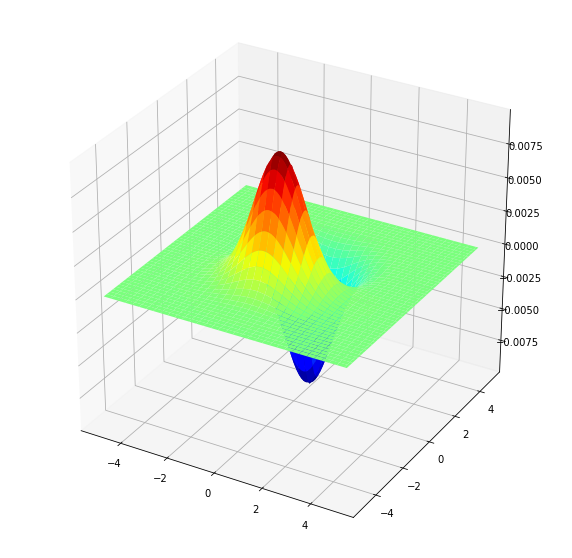

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
import math

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
sigma = 1

X = np.arange(-5, 5.1, 0.1)
Y = np.arange(-5, 5.1, 0.1)
X, Y = np.meshgrid(X, Y)
Z = 1./(2*math.pi*sigma)*np.exp(-(X**2 + Y**2)/(2*sigma**2))
Z_ = Z
Zx = Z[1:-1, :] - Z_[0:-2, :]

surf = ax.plot_surface(X[1:-1, :], Y[1:-1, :], Zx, cmap=cm.jet, linewidth=0, antialiased=True)
plt.show()

Gaussian Kernel (Matrix Representation):
[[0.01831564 0.0222592  0.02678268 ... 0.02678268 0.0222592  0.01831564]
 [0.0222592  0.02705185 0.03254928 ... 0.03254928 0.02705185 0.0222592 ]
 [0.02678268 0.03254928 0.0391639  ... 0.0391639  0.03254928 0.02678268]
 ...
 [0.02678268 0.03254928 0.0391639  ... 0.0391639  0.03254928 0.02678268]
 [0.0222592  0.02705185 0.03254928 ... 0.03254928 0.02705185 0.0222592 ]
 [0.01831564 0.0222592  0.02678268 ... 0.02678268 0.0222592  0.01831564]]


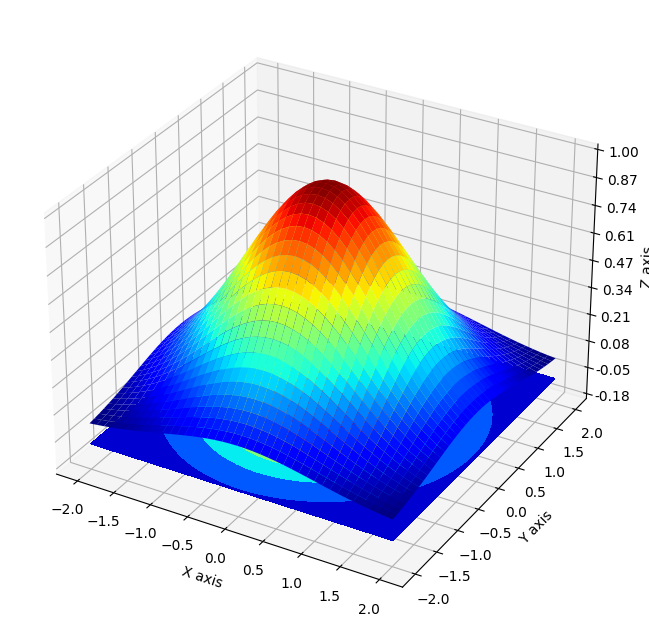

In [12]:
import cv2 as cv

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

# Define Gaussian kernel parameters
sigma = 1

# Define Gaussian kernel range
X = np.arange(-2, 2.1, 0.1)
Y = np.arange(-2, 2.1, 0.1)
X, Y = np.meshgrid(X, Y)

# Calculate Gaussian kernel values
Z = np.exp(-(X ** 2 + Y ** 2) / (2 * sigma ** 2))

# Print the kernel as a matrix
print("Gaussian Kernel (Matrix Representation):")
print(Z)

# Plot the Gaussian kernel as a 3D surface
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap=cm.jet, linewidth=0.5, antialiased=True)

# Customize the z axis
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_aspect('auto')
cset = ax.contourf(X, Y, Z, zdir='z', offset=np.min(Z) - 0.1, cmap=cm.jet)
ax.set_zlim(np.min(Z) - 0.2, np.max(Z))

# Show grid lines
ax.grid(True)

# Set labels for better visualization
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

plt.show()

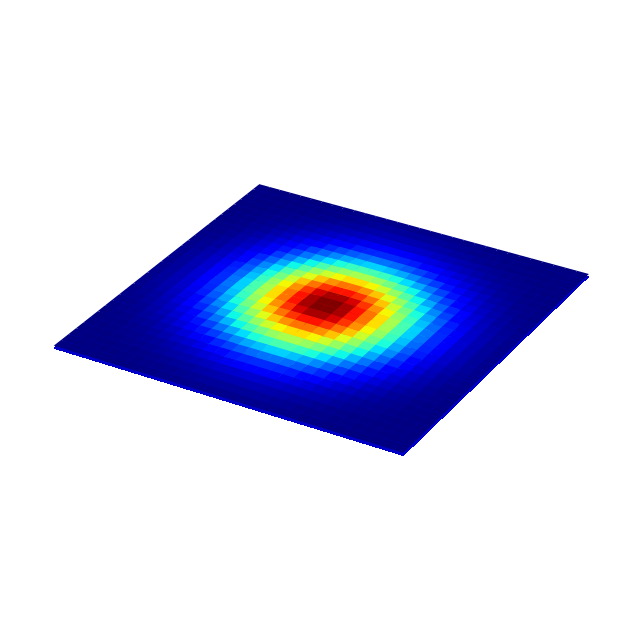

In [11]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
sigma = 1

# Define Gaussian kernel range
X = np.arange(-3, 3.1, 0.1)
Y = np.arange(-3, 3.1, 0.1)
X, Y = np.meshgrid(X, Y)

# Calculate Gaussian kernel values
Z = (1 / (2 * np.pi * sigma ** 2)) * np.exp(-(X ** 2 + Y ** 2) / (2 * sigma ** 2))

# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap=cm.jet, linewidth=0, antialiased=True)

# Customize the z axis
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_aspect('equal', 'box')
cset = ax.contourf(X, Y, Z, zdir='z', offset=np.min(Z) - 0.1, cmap=cm.jet)
ax.set_zlim(np.min(Z) - 0.2, np.max(Z))

# Hide grid lines and axis ticks
ax.grid(False)
plt.axis('off')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

plt.show()

### Effect of $\sigma$

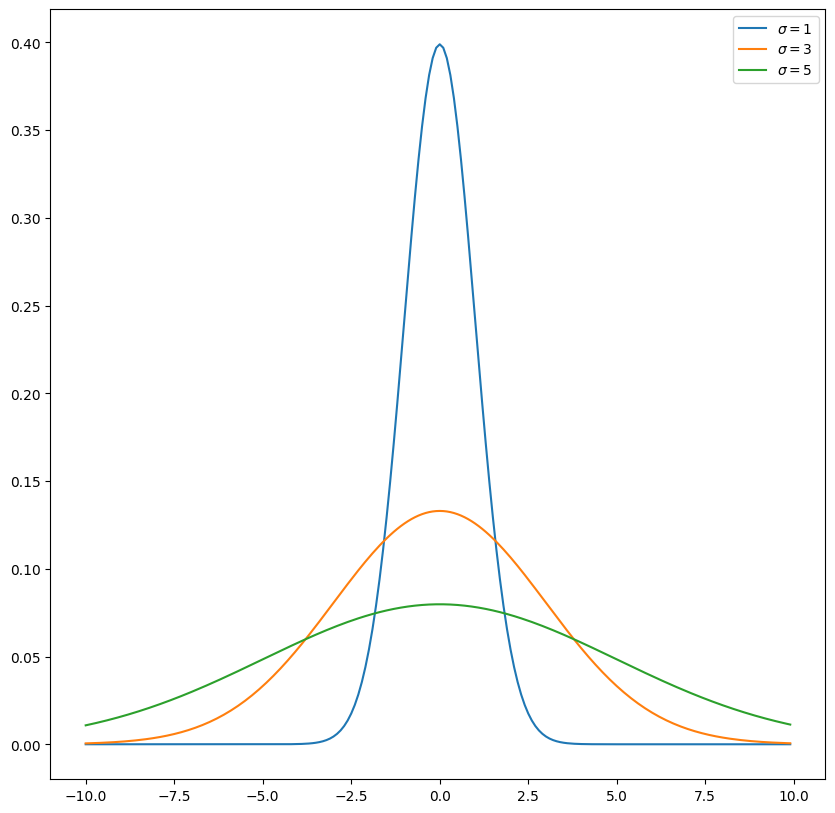

In [14]:
import cv2 as cv

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


def g(x, mu, sigma):
    return 1./(sigma*np.sqrt(2.*np.pi))*np.exp(-(x-mu)**2/(2*sigma**2))


x = np.arange(-10., 10., 0.1)
fig, ax  = plt.subplots(1,1, sharex='all', sharey='all', figsize=(10,10))
ax.plot(x, g(x, 0, 1), label='$\sigma=1$')
ax.plot(x, g(x, 0, 3), label='$\sigma=3$')
ax.plot(x, g(x, 0, 5), label='$\sigma=5$')
ax.legend()
plt.show()

# Smoothign with Box Filter (Averaging) vs Gaussian filter

[[0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]]


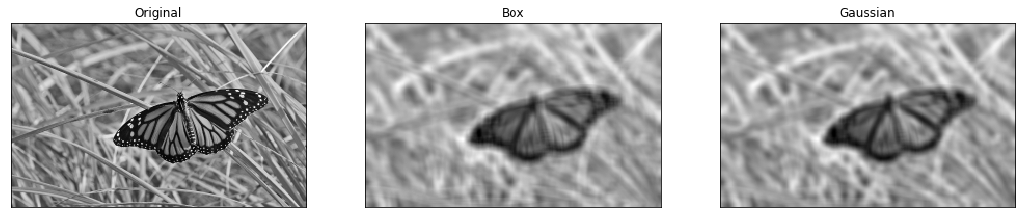

In [ ]:
#  Box filer
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

img = cv.imread('./images/butterfly.jpg', cv.IMREAD_REDUCED_GRAYSCALE_4)

# Box filter
box = 1./81.*np.ones((9,9))
imgb = cv.filter2D(img,-1,box)


# Box filter
gaus = cv.getGaussianKernel(9, 4)
imgg = cv.sepFilter2D(img, -1, gaus, gaus)


fig, axes  = plt.subplots(1,3, sharex='all', sharey='all', figsize=(18,18))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(imgb, cmap='gray')
axes[1].set_title('Box')
axes[1].set_xticks([]), axes[1].set_yticks([])
axes[2].imshow(imgg, cmap='gray')
axes[2].set_title('Gaussian')
axes[2].set_xticks([]), axes[1].set_yticks([])
plt.show()

# Gaussian Noise -> Can Remove from Gaussian Kernal by `cv.GaussianBlur`

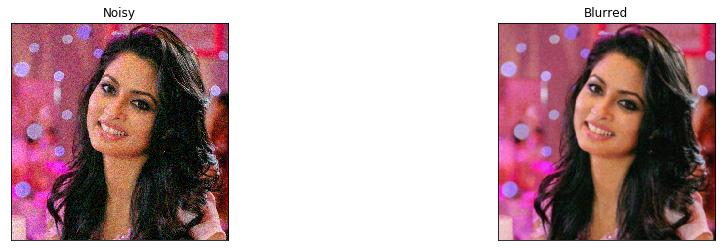

In [ ]:
%matplotlib inline
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
fn = './images/puja.jpg'
imgo = cv.imread(fn, cv.IMREAD_REDUCED_COLOR_2)
imgo = cv.cvtColor(imgo, cv.COLOR_BGR2RGB)
mu = 0.
sigma = 20.
noise = np.array(imgo.shape).astype('uint8')
noise = np.random.normal(mu,sigma,imgo.shape)
noise = noise.reshape(imgo.shape)
imgn = cv.add(imgo, noise, dtype=cv.CV_8UC3)
imgb = cv.GaussianBlur(imgn,(5,5),0)
f = plt.figure(figsize=(16,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.imshow(imgn), ax1.title.set_text('Noisy')
ax2.imshow(imgb), ax2.title.set_text('Blurred')
ax1.set_xticks([]), ax1.set_yticks([])
ax2.set_xticks([]), ax2.set_yticks([])
plt.show()

### Effect of Gaussian Kernel Size for remove Gaussan noise

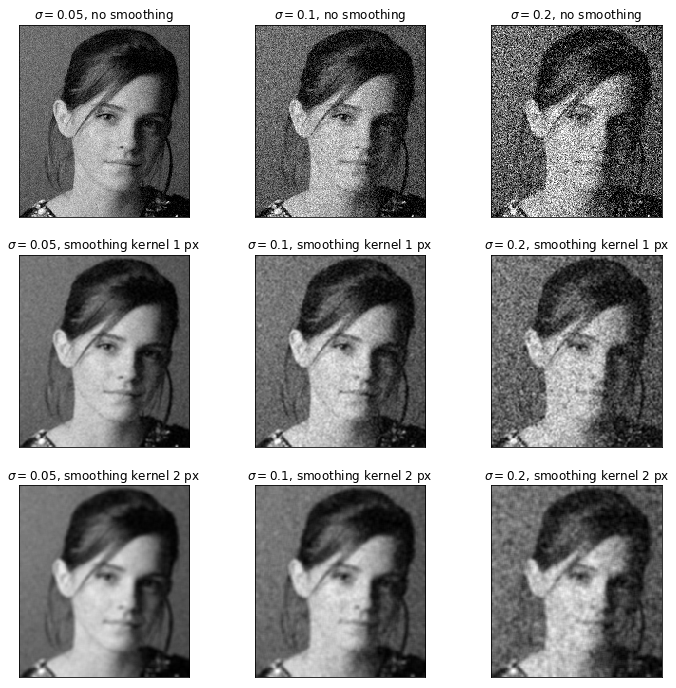

In [ ]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
img = cv.imread('./images/emma.jpg', cv.IMREAD_REDUCED_GRAYSCALE_4)


mean = 0.
noise = [0.05, 0.1, 0.2]
sigma = [0, 1, 2]
sigma_text = ['no smoothing', 'smoothing kernel 1 px', 'smoothing kernel 2 px']
fig, axes  = plt.subplots(3, 3, sharex='all', sharey='all', figsize=(12,12))


for i in range(3):
    for j in range(3):
        gauss = np.random.normal(mean,noise[i]*255., img.shape)
        gauss = gauss.reshape(img.shape)
        imn = img + gauss
        imn = np.clip(imn, 0.0, 255.0)
        ksize = sigma[j]*2+1
        if j != 0:
            imn = cv.GaussianBlur(imn, (ksize, ksize), sigmaX=sigma[j], sigmaY=sigma[j])

        axes[j,i].imshow(imn, cmap='gray')
        axes[j,i].set_title(r'$\sigma={0}$, {1}'.format(noise[i], sigma_text[j]))
        axes[j,i].set_xticks([]), axes[j,i].set_yticks([])

plt.show()


### Analysis:
This code adds **Gaussian noise** to an image and optionally applies **Gaussian smoothing** to reduce noise.

1. **Noise Addition**:
   - For each subplot, Gaussian noise is generated with varying standard deviations (`noise = [0.05, 0.1, 0.2]`).
   - The noise is scaled by $ 255 \times \text{noise level} $ to match the image intensity range (0 to 255).
   - The noisy image is created by adding this Gaussian noise to the original image.

2. **Gaussian Smoothing**:
   - Three different smoothing options are applied (`sigma = [0, 1, 2]`), corresponding to no smoothing, a 1-pixel Gaussian blur, and a 2-pixel Gaussian blur.
   - If the smoothing level is non-zero, the noisy image is blurred using `GaussianBlur()` with a kernel size calculated by `ksize = sigma[j]*2+1`.
   - The larger the sigma value, the more smoothing is applied.

### Analysis of the Output Image:

- **Top row (No smoothing)**:
   - The noise becomes more visible as the noise level ( $ \sigma $ ) increases.
   - For $ \sigma = 0.2 $, the image is heavily corrupted by noise, making the face difficult to recognize.

- **Middle row (1 px smoothing)**:
   - A small amount of smoothing reduces some noise, especially at $ \sigma = 0.05 $ and $ \sigma = 0.1 $.
   - At $ \sigma = 0.2 $, the smoothing helps, but noise is still prominent.

- **Bottom row (2 px smoothing)**:
   - Stronger smoothing significantly reduces noise, even at higher noise levels.
   - However, at $ \sigma = 0.2 $, the smoothing introduces blurring, reducing image sharpness.



# Salt-and-Pepper Noise -> Can Remove from Median Kernal by `cv.medianBlur`

(237, 355, 3)


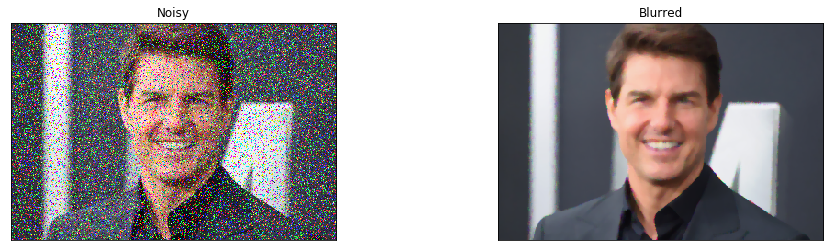

In [ ]:
def salt_pepper_noise(img, p):
    print(img.shape)
    rnd = np.random.random(img.shape)
    noisy = img.copy()
    noisy[rnd < p] = 0
    noisy[rnd > 1 - p] = 255
    return noisy



%matplotlib inline
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
fn = './images/tom.jpg'
imgo = cv.imread(fn, cv.IMREAD_REDUCED_COLOR_2)
imgo = cv.cvtColor(imgo, cv.COLOR_BGR2RGB)
imgs = salt_pepper_noise(imgo, 0.1)
imgm = cv.medianBlur(imgs, 5)
f = plt.figure(figsize=(16,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.imshow(imgs), ax1.title.set_text('Noisy')
ax2.imshow(imgm), ax2.title.set_text('Blurred')
ax1.set_xticks([]), ax1.set_yticks([])
ax2.set_xticks([]), ax2.set_yticks([])
plt.show()

Algorithm

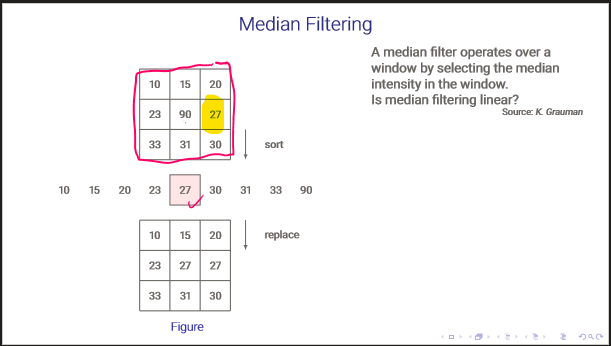

Code for a simple two-dimensional median filter algorithm might look like this:



```
1. allocate outputPixelValue[image width][image height]
2. allocate window[window width × window height]
3. edgex := (window width / 2) rounded down
4. edgey := (window height / 2) rounded down
```


```
for x from edgex to image width - edgex do
for y from edgey to image height - edgey do
    i = 0
    for fx from 0 to window width do
        for fy from 0 to window height do
            window[i] := inputPixelValue[x + fx - edgex][y + fy - edgey]
            i := i + 1
    sort entries in window[]
    outputPixelValue[x][y] := window[window width * window height / 2]
```
This algorithm:

Processes one color channel only,
Takes the "not processing boundaries" approach (see above discussion about boundary issues).

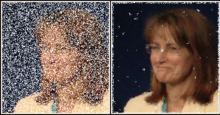

Histogram of salt paper

c:\python37\opencv\lib\site-packages\ipykernel_launcher.py:48: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
c:\python37\opencv\lib\site-packages\ipykernel_launcher.py:54: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


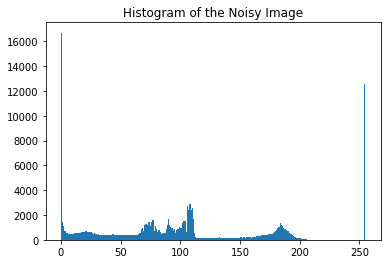

In [ ]:

%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
img = cv.imread('./images/emma.jpg', cv.IMREAD_REDUCED_GRAYSCALE_2)
imn =  noisy('s&p', img.astype('float32'))
imf = cv.medianBlur(imn, 5)

plt.hist(imn.ravel(), bins=256)
plt.title('Histogram of the Noisy Image')


cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
cv.imshow("Image", imn.astype('uint8'))
cv.waitKey(0)
cv.imshow("Image", imf.astype('uint8'))
cv.waitKey(0)
cv.destroyAllWindows()

Gaussian Kernels fails on Salt-and-Pepper Noise but Median 3x3 Kernel shows superior performence

c:\python37\opencv\lib\site-packages\ipykernel_launcher.py:48: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
c:\python37\opencv\lib\site-packages\ipykernel_launcher.py:54: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


[1.5 2.5 3.5]


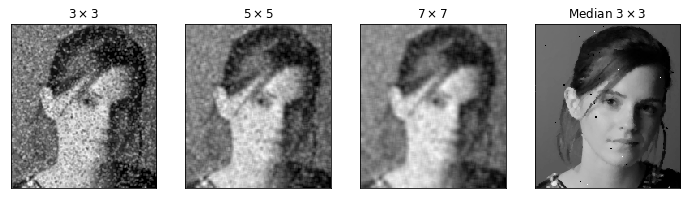

In [ ]:
# Effect of Gaussian Kernel Size
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
img = cv.imread('./images/emma.jpg', cv.IMREAD_REDUCED_GRAYSCALE_4)
imn =  noisy('s&p', img.astype('float32'))

ksize = np.array([3, 5, 7])
sigma = ksize/2.
print(sigma)
fig, axes  = plt.subplots(1, 4, sharex='all', sharey='all', figsize=(12,12))


for i in range(3):
    imf = cv.GaussianBlur(imn, (ksize[i], ksize[i]), sigmaX=sigma[i], sigmaY=sigma[i])
    axes[i].imshow(imf, cmap='gray')
    axes[i].set_title(r'${0}\times {0}$'.format(ksize[i]))
    axes[i].set_xticks([]), axes[i].set_yticks([])

imf = cv.medianBlur(imn, 3)
axes[3].imshow(imf, cmap='gray')
axes[3].set_title(r'Median ${0}\times {0}$'.format(3))
axes[3].set_xticks([]), axes[i].set_yticks([])

plt.show()


# Sharpening
125 added to the img - smoothed when displaying

DescribeResult(nobs=84135, minmax=(-82.0, 73.0), mean=-0.0037915255, variance=32.501984, skewness=-0.4540293514728546, kurtosis=24.649533473798122)


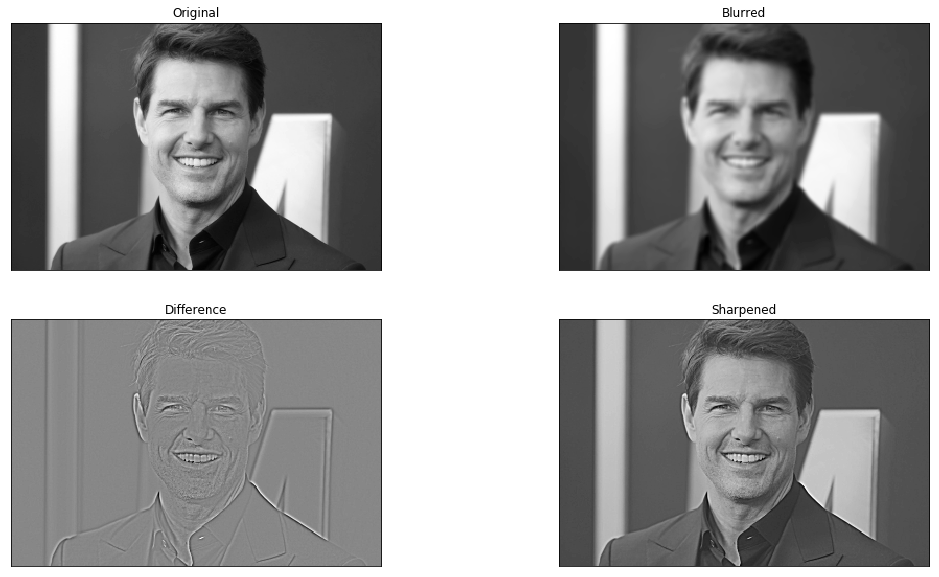

In [ ]:
# Sharpening
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
from scipy import stats

img = cv.imread('./images/tom.jpg', cv.IMREAD_REDUCED_GRAYSCALE_2)

sigma = 2
kernel = cv.getGaussianKernel(5, sigma)
blurred = cv.sepFilter2D(img, -1, kernel, kernel, anchor=(-1,-1), delta=0, borderType=cv.BORDER_REPLICATE)
diff = img.astype('float32') - blurred.astype('float32')

sharpened = cv.addWeighted(img.astype('float32') , 1.0, diff, 1.5, 0)

print(stats.describe(diff.ravel()))




fig, axes  = plt.subplots(2,2, sharex='all', sharey='all', figsize=(18,10))
axes[0,0].imshow(img, cmap='gray')
axes[0,0].set_title('Original')
axes[0,0].set_xticks([]), axes[0,0].set_yticks([])
axes[0,1].imshow(blurred, cmap='gray')
axes[0,1].set_title('Blurred')
axes[0,1].set_xticks([]), axes[0,1].set_yticks([])
axes[1,0].imshow(diff + 125, cmap='gray')
axes[1,0].set_title('Difference')
axes[1,0].set_xticks([]), axes[1,0].set_yticks([])
axes[1,1].imshow(sharpened, cmap='gray')
axes[1,1].set_title('Sharpened')
axes[1,1].set_xticks([]), axes[1,1].set_yticks([])
plt.show()


# Unsharp Mask Filter

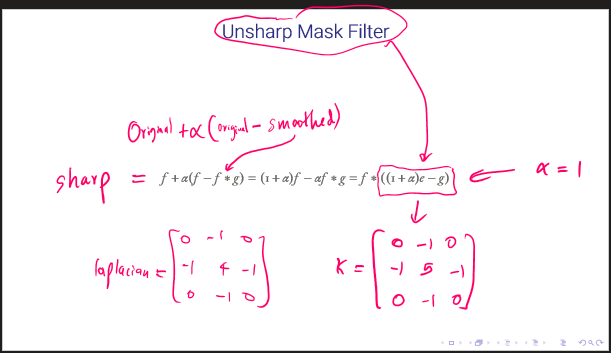

Sharpenign Using Unsharp Marsking Filer

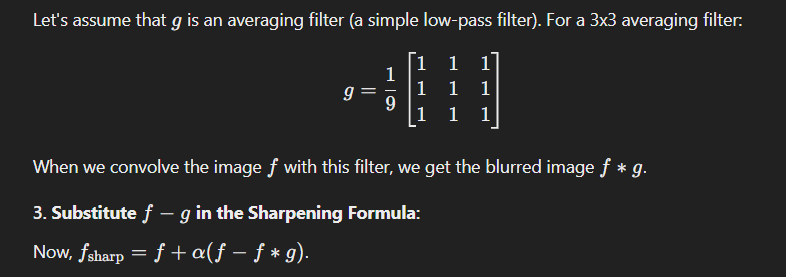

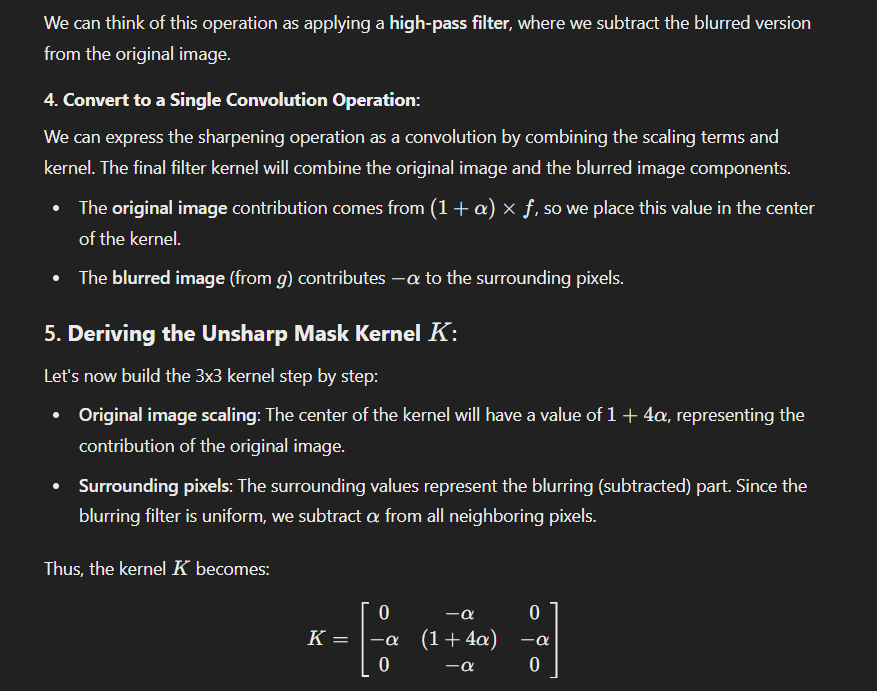

(41, 41)


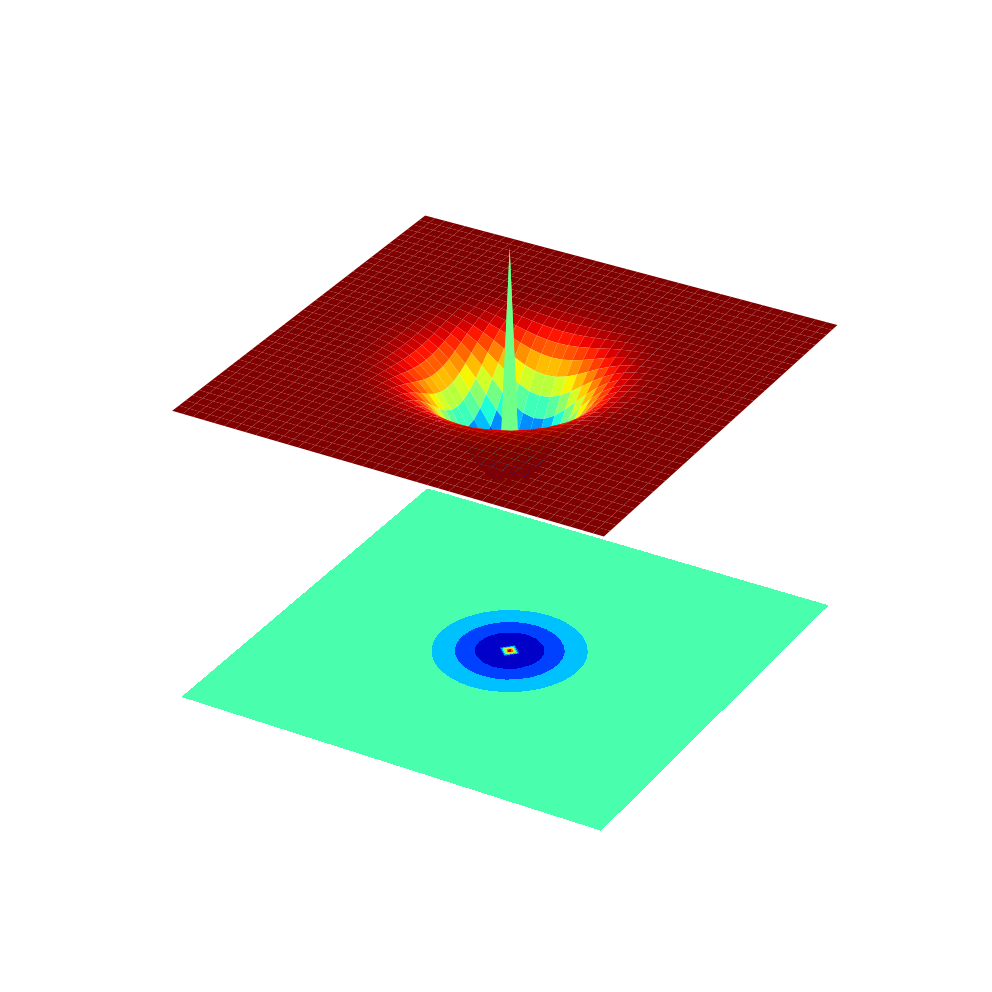

In [ ]:
import cv2 as cv

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

fig = plt.figure(figsize=(18,18))
ax = fig.add_subplot(111, projection='3d')
sigma = 1


X = np.arange(-5, 5.25, 0.25)
Y = np.arange(-5, 5.25, 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.exp(-(X**2 + Y**2)/(2*sigma**2))
imp = np.zeros(Z.shape)
print(Z.shape)
imp[int(Z.shape[0]/2), int(Z.shape[1]/2)] = 2
Z = imp - Z

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.jet, linewidth=0, antialiased=True)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_aspect('equal', 'box')
#ax.view_init(90, 0)
cset = ax.contourf(X, Y, Z, zdir='z', offset=np.min(Z) -1.5, cmap=cm.jet)
ax.set_zlim(np.min(Z) - 2, np.max(Z))
# Add a color bar which maps values to colors.
#fig.colorbar(surf, shrink=0.5, aspect=5)
# Hide grid lines
# ax.grid(False)
plt.axis('off')

# Hide axes ticks
# ax.set_xticks([])
# ax.set_yticks([])
# ax.set_zticks([])


plt.show()

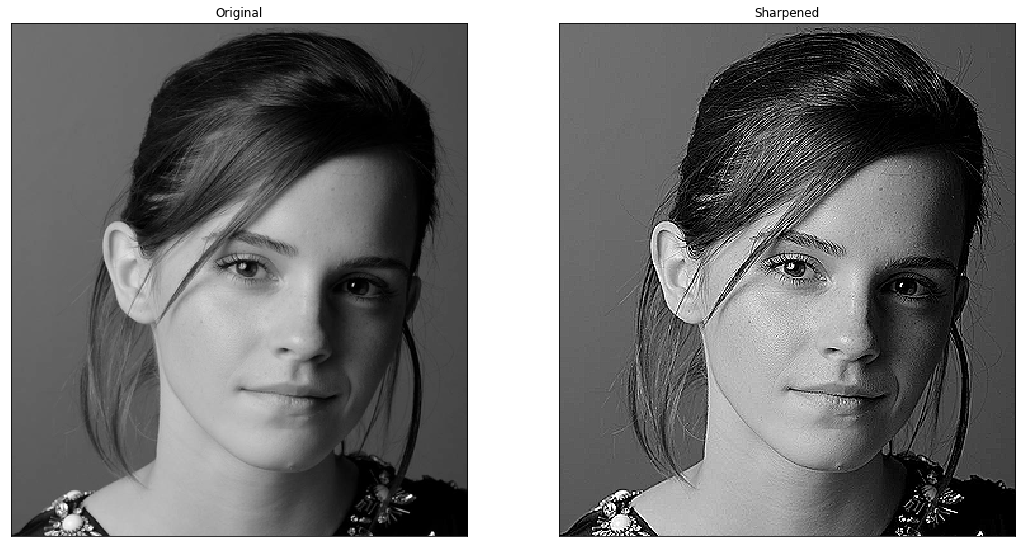

In [ ]:
%matplotlib inline
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('../images/emma.jpg', cv.IMREAD_REDUCED_GRAYSCALE_2)

# Sobel vertical
kernel = np.array([(0, -1, 0), (-1, 5, -1), (0, -1, 0)], dtype='float') # for alpha =1
imgc = cv.filter2D(img,-1,kernel)

#cv.imwrite('../../EN2550Lectures/en2550_lec03_spatial_filtering/figures/sigiriya_sobel_horizontal.jpg', imgc)

fig, axes  = plt.subplots(1,2, sharex='all', sharey='all', figsize=(18,18))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(imgc, cmap='gray')
axes[1].set_title('Sharpened')
axes[1].set_xticks([]), axes[1].set_yticks([])
plt.show()